# Kristin Meier
# Hw 2

### Sort Algorithms
Write a program (2 functions) that works exactly like the sorted() built-in function in python. Follow the following:
1. Function has 3 input parameters: iterable of objects, key, and reversed.
2. List can be numeric, string, or comparable user defined objects
3. The function returns a new sorted list
4. The function also returns:
    - Number of comparisons
    - Number of swaps
    - Timer measure
5. Implement both bubble and merge sort.
6. Compare your functions on a randomly generated data
7. Present your findings thru plots and summary tables

Document step-by-step how to use/run your code.

**Note: I wrote my comments as markdown cells and have been including links for reference so I can keep the materials organized.**

### Helpful links
- [Bubble Sort](https://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html)
- [Merge Sort](http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html)
- [Merge Sort hw](http://stackoverflow.com/questions/40050849/merge-sort-count-comparisons)
- [Merge Sort help code](http://stackoverflow.com/questions/18761766/mergesort-python)
- [Sorting How To - Python](https://wiki.python.org/moin/HowTo/Sorting)
    - Starting with Python 2.4, both list.sort() and sorted() added a key parameter to specify a function to be called on each list element prior to making comparisons. 
    - The value of the key parameter should be a function that takes a single argument and returns a key to use for sorting purposes. This technique is fast because the key function is called exactly once for each input record. A common pattern is to sort complex objects using some of the object's indices as a key
- [Timer](http://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python)
- [Python Library Built in Functions](https://docs.python.org/2/library/functions.html)
- [Python Sorting](https://developers.google.com/edu/python/sorting)
- [Sorting Examples](http://www.thegeekstuff.com/2014/06/python-sorted/)
- [C source code](http://svn.python.org/view/python/trunk/Objects/listobject.c?revision=69227&view=markup)
- [Sorting visual](http://sorting.at/)



In [1]:
# import necessary libraries
from timeit import default_timer as timer
from operator import itemgetter
import random
from random_words import RandomWords
rw = RandomWords()
import numpy as np
import pylab as plt
import plotly.plotly as py
import matplotlib.pyplot as plt
import pylab
import matplotlib.patches as mpatches
from pandas import DataFrame as df

## Bubble Sort Function

- Parameters
    - alist = list to be sorted
    - reverse = True/False
    - key = function for which to sort on, if applicable
    - toprint = True/False , prints output as list if True
- Returns
    - toprint = T: prints of sorted list, number of comparisons, number of swaps and elapsed time
    - toprint = F: list of sorted list, number of comparisons, number of swaps and elapsed time

In [2]:
# bubble sort function w extra parameters
def bubbleSort(alist, 
               reverse = 'False', 
               key = lambda x:x,
               toprint = 'True'):

    # initialize timer
    start_time = timer()
    # initialize comparison count
    comparison_count = 0
    # initialize swap count
    swap_count = 0
    
    if reverse == 'False':
        for passnum in range(len(alist)-1,0,-1):

            for i in range(passnum):
                # increase comparison count by 1
                comparison_count += 1

                if key(alist[i])>key(alist[i+1]):
                    # increase swap count by 1
                    swap_count += 1
                    # don't need to use temp can jst swap them
                    alist[i],alist[i+1] = alist[i+1],alist[i]
    
    # can't just flip list at the end b/c # swaps will be incorrect
    # ex. [4,3,2,1] reverse = T should have 0 swaps
    if reverse == 'True':
        for passnum in range(len(alist)-1,0,-1):

            for i in range(passnum):
                # increase comparison count by 1
                comparison_count += 1

                if key(alist[i])<key(alist[i+1]):
                    # increase swap count by 1
                    swap_count += 1
                    # don't need to use temp can jst swap them
                    alist[i],alist[i+1] = alist[i+1],alist[i]
    
    # stop the timer            
    end_time = timer()
    
    if toprint == 'True':
        print(alist)
        print('Comparison Count:',comparison_count)
        print('Swap Count:',swap_count)
        print('Elapsed Time:',end_time - start_time)
    
    else:
        return(alist,[comparison_count,swap_count, end_time-start_time])

### Bubble sort function output

In [3]:
NL2 = [6,5,4,3,2,1]
bubbleSort(NL2,reverse='False')
WL = "This is a test string from Andrew".split()
bubbleSort(WL,reverse='True',key=str.lower)

[1, 2, 3, 4, 5, 6]
Comparison Count: 15
Swap Count: 15
Elapsed Time: 3.015101538039744e-05
['This', 'test', 'string', 'is', 'from', 'Andrew', 'a']
Comparison Count: 21
Swap Count: 6
Elapsed Time: 4.004800575785339e-05


## Merge Sort Function

Pass the timer only once, when the function is initialized (it is called recursively). This function will print the output but if toprint = 'False' it will return a list to be referenced later.

- Parameters
    - a_list = list to be sorted
    - reverse = True/False
    - key = function for which to sort on, if applicable
    - toprint = True/False , prints output as list if True
    - newtime, comparison_count, swap_count: initializes counts and timer for output
- Returns
    - toprint = T: prints of sorted list, number of comparisons, number of swaps and elapsed time
    - toprint = F: list of sorted list, number of comparisons, number of swaps and elapsed time

In [4]:
# so comparisons and swaps only occur on the merging portion
# check that the counts are in the correct place. newtime argument allows the print to only happen 1x
# Pass the timer only once, when the function is initialized (it is called recursively). 

def merge_sort(a_list, 
               reverse = 'False',
               newtime = 'True',
               comparison_count = 0,
               swap_count = 0,
               toprint = 'True',
               key = lambda x:x):
    
    if newtime == 'True':
        start_time = timer()
    
    #print("Splitting ", a_list)
    if len(a_list) > 1:
        mid = len(a_list) // 2
        left_half = a_list[:mid]
        right_half = a_list[mid:]
        # the function is called again...could mess up counter, pass the arguments through here 
        # including key argument
        merge_sort(a_list=left_half, reverse=reverse, newtime='False',
                    comparison_count=comparison_count, swap_count=swap_count, key=key)
        merge_sort(a_list=right_half, reverse=reverse, newtime='False',
                    comparison_count=comparison_count, swap_count=swap_count, key=key)

        i = 0
        j = 0
        k = 0    

        while i < len(left_half) and j < len(right_half):
            # increase comparison count by 1
            comparison_count += 1 
                
                
            # IF REGULAR
            if reverse == 'False':
                if key(left_half[i]) < key(right_half[j]):    
                    a_list[k] = left_half[i]
                    i = i + 1
                else:
                    # would this be a swap situation: right side is larger than left
                    # increase swap count by 1
                    swap_count += 1

                    a_list[k] = right_half[j]
                    j = j + 1
                k = k + 1

            # IF REVERSE
            if reverse == 'True':    
                if key(left_half[i]) > key(right_half[j]):
                    a_list[k] = left_half[i]
                    i = i + 1
                else:
                    # would this be a swap situation: right side is larger than left
                    # increase swap count by 1
                    swap_count += 1

                    a_list[k] = right_half[j]
                    j = j + 1
                k = k + 1
                
        while i < len(left_half):
            a_list[k] = left_half[i]
            i = i + 1
            k = k + 1

        while j < len(right_half):
            a_list[k] = right_half[j]
            j = j + 1
            k = k + 1
    #print("Merging ", a_list)
     
   
    if newtime == 'True' and toprint == 'True':
        print(a_list)
        print('Comparison Count:',comparison_count)
        print('Swap Count:',swap_count)
        print('Elapsed Time:',timer() - start_time)
    if newtime == 'True' and toprint == 'False':
        return(a_list,[comparison_count,swap_count, timer()-start_time])
    

### Merge sort function output

In [5]:
WL = "This is a test string from Andrew".split()
NL = [5, 2, 3, 1, 4]
merge_sort(NL,reverse='True')
merge_sort(WL,reverse='True',key=str.lower)

[5, 4, 3, 2, 1]
Comparison Count: 4
Swap Count: 2
Elapsed Time: 0.000108768988866359
['This', 'test', 'string', 'is', 'from', 'Andrew', 'a']
Comparison Count: 6
Swap Count: 4
Elapsed Time: 7.80120026320219e-05


## Create function for randomly generated data

- Create randomly generated data in form of numbers, words, or pairs of numbers
- randlist()
    - Parameters:
        - listtype = words, numbers, or pairs
        - length = length of list
    - Returns:
        - list
- Loop through both functions using random data and store values for swaps/comparisons

**Helpful Links**
Issues with zip function
- [python 2 > 3](http://stackoverflow.com/questions/31011631/python-2-3-object-of-type-zip-has-no-len)
- (https://bradmontgomery.net/blog/pythons-zip-map-and-lambda/)

In [6]:
def randlist(length=25,
             # listtype = words, numbers, pairs
             listtype = 'words'):
    # length is the length of the list
    # random list of numbers
    if listtype == 'numbers':
        thelist = random.sample(range(1, 100000), length)
    if listtype == 'words':
        thelist = rw.random_words(count=length)
    if listtype == 'pairs':
        a = random.sample(range(1, 100000), length)
        b = random.sample(range(1, 100000), length)
        thelist = list(zip(a,b))
    # randomly order
    random.shuffle(thelist)
    return thelist

## Testing sort functions on random lists (of numbers)

Calculates swaps and comparisons for both functions using different list lengths and types.
This section loops through random lists of different lengths and saves output as a list. For this exercise, numeric lists are used with lengths 2 to 1000.

In [7]:
bubble = []
merge = []
listlength = []
typei = "numbers"

for i in list(range(2,1000,20)):
    input = randlist(length=i,listtype=typei)
    bubble = bubble + [bubbleSort(input, reverse='False',toprint='False')]
    listlength = listlength + [len(input)]

for i in list(range(2,1000,20)):
    input = randlist(length=i,listtype=typei)
    merge = merge + [merge_sort(input, reverse='False', toprint='False')]

## Data for comparison tables and charts

Now the specific output are extracted from the lists. Saving the list comparison count, swap count, and time will allow for easy plotting of the data.

In [8]:
# get list of comparison number, swap number, and time number for plotting
merge_comps = []
merge_swaps = []
merge_times = []
bubble_comps = []
bubble_swaps = []
bubble_times = []

for i in range(1,len(merge)):
    merge_comps = merge_comps + [merge[i][1][0]]
    merge_swaps = merge_swaps + [merge[i][1][1]]
    merge_times = merge_times + [merge[i][1][2]]
    bubble_comps = bubble_comps + [bubble[i][1][0]]
    bubble_swaps = bubble_swaps + [bubble[i][1][1]]
    bubble_times = bubble_times + [bubble[i][1][2]]


## Summary Tables - for random numeric lists from length 2-1000

Prepare summary tables of output data such as number of comparisons, number of swaps, and elapsed time.


**Helpful Links**
- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html)
- [Pandas doc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
- [Summary Statistics](http://www.marsja.se/pandas-python-descriptive-statistics/)
- [Describe data frame](http://stackoverflow.com/questions/22235245/calculate-summary-statistics-of-columns-in-dataframe/22235393)
- [Group by example](http://stackoverflow.com/questions/37532525/python-pandas-create-summary-table)
- [Summary table help](http://stackoverflow.com/questions/30263627/python-pandas-summary-table-plot)

In [9]:
data = df(data = {
 '1_bubble_num_comp': bubble_comps
,'1_merge_num_comp': merge_comps
,'2_bubble_num_swaps': bubble_swaps
,'2_merge_num_swaps': merge_swaps
,'3_bubble_elapsed_time':bubble_times
,'3_merge_elapsed_time': merge_times})

data.describe().round(3)

,1_bubble_num_comp,1_merge_num_comp,2_bubble_num_swaps,2_merge_num_swaps,3_bubble_elapsed_time,3_merge_elapsed_time
count,49.000,49.000,49.000,49.000,49.000,49.000
mean,165751.000,499.735,82662.633,249.980,0.098,0.005
std,147798.457,286.428,73994.068,143.083,0.089,0.003
min,231.000,18.000,127.000,11.000,0.000,0.000
25%,34191.000,260.000,17843.000,131.000,0.019,0.002
50%,125751.000,499.000,62395.000,251.000,0.070,0.005
75%,274911.000,741.000,137966.000,371.000,0.159,0.007
max,481671.000,980.000,235670.000,489.000,0.282,0.010


## Creating plot functions for comparison

Scatterplots and histograms will be used to showcase the distributions of counts for the various outputs.

- comparescat(): scatterplots
- comparehist(): histograms (less helpful due to scale difference)
    - Parameters
        - bubbledata: list of bubble sort performance data
        - mergedata: list of bubble sort performance data
        - listdata: list of list lengths from performance data
        - title: title of chart

In [10]:

def comparescat(bubbledata,
               mergedata,
                listdata,
               title=''):
    # http://stackoverflow.com/questions/26690480/matplotlib-valueerror-x-and-y-must-have-same-first-dimension
    x = np.array([listdata])
    y = np.array([bubbledata])
    z = np.array([mergedata])

    plt.plot(x, y, 'rs', x, z, 'bs')
    plt.xlabel('List Length')
    plt.ylabel(title)
    red_patch = mpatches.Patch(color='red', label='Bubble')
    blue_patch = mpatches.Patch(color='blue', label='Merge')
    plt.legend(handles=[red_patch,blue_patch],loc='upper left')
    plt.show()

def comparehist(bubbledata,
                   mergedata,
                   title=''):
    # http://matplotlib.org/examples/api/barchart_demo.html
    # https://plot.ly/matplotlib/histograms/
    x = bubbledata
    y = mergedata
    # ylim max
    plt.ylim([0,60])
    n, bins, patches = plt.hist([x, y])
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend(('Bubble', 'Merge'), loc='upper right')
    plt.show()

## Plots of Comparisons, Swaps, and Time

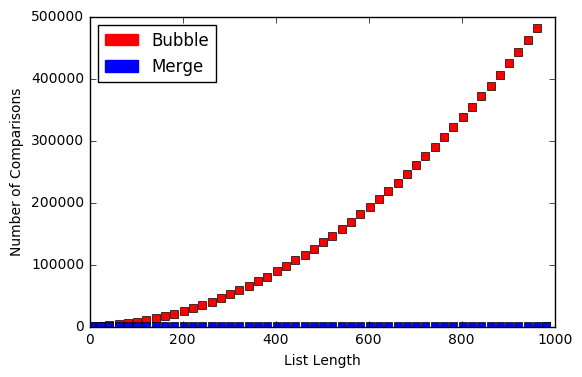

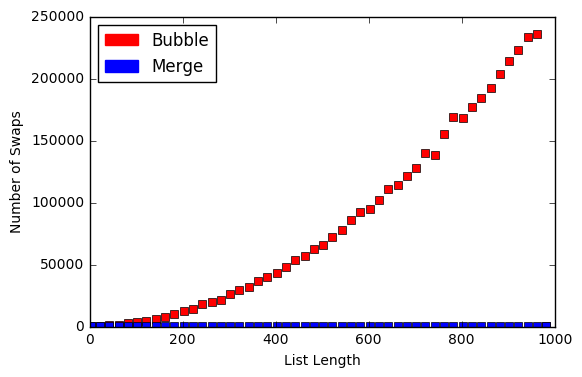

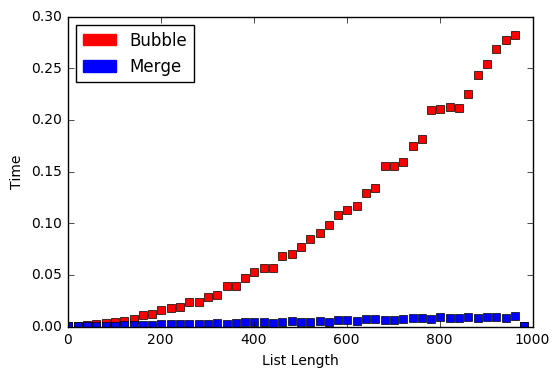

In [11]:
comparescat(bubbledata=bubble_comps,
               mergedata=merge_comps,
                listdata=listlength,
               title = 'Number of Comparisons')
comparescat(bubbledata=bubble_swaps,
               mergedata=merge_swaps,
            listdata=listlength,
               title = 'Number of Swaps')
comparescat(bubbledata=bubble_times,
               mergedata=merge_times,
            listdata=listlength,
               title = 'Time')

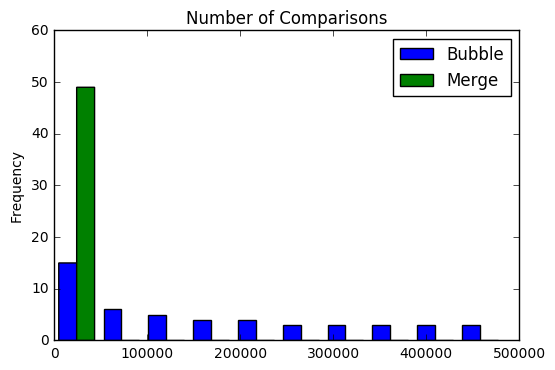

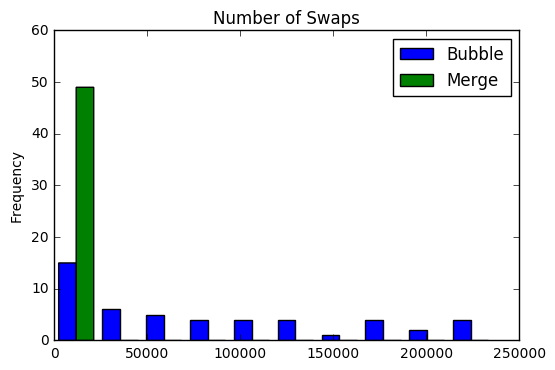

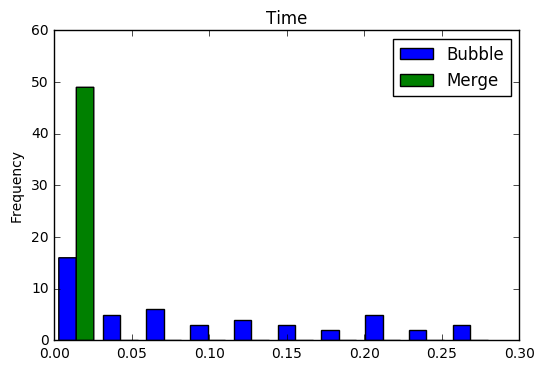

In [12]:
comparehist(bubbledata=bubble_comps,
               mergedata=merge_comps,
               title = 'Number of Comparisons')
comparehist(bubbledata=bubble_swaps,
               mergedata=merge_swaps,
               title = 'Number of Swaps')
comparehist(bubbledata=bubble_times,
               mergedata=merge_times,
               title = 'Time')